In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy import stats

In [45]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


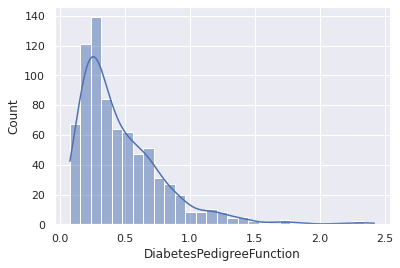

In [46]:
sns.histplot(data=df, x="DiabetesPedigreeFunction", kde=True)

In [47]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

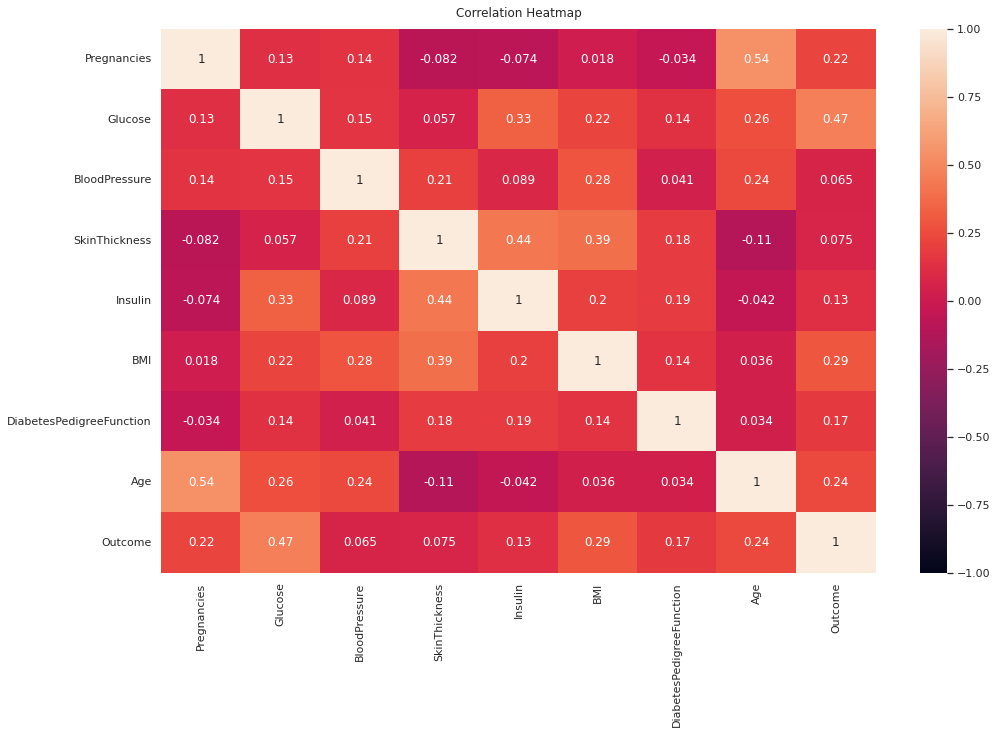

In [48]:
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [49]:
corr_matrix = df.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

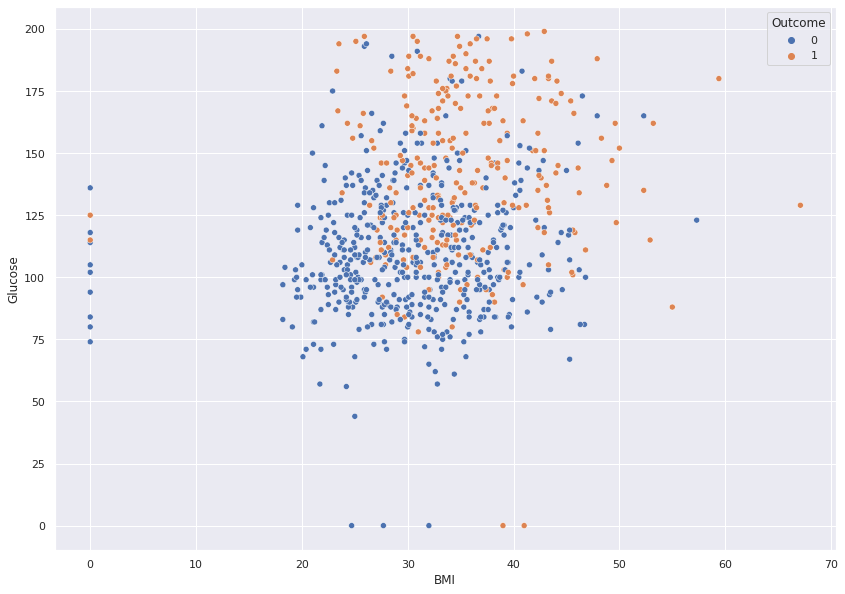

In [50]:
fig, ax = plt.subplots(figsize=(14,10))
sns.set_theme()
sns.scatterplot(x='BMI', y='Glucose', data=df, hue='Outcome')
plt.show()

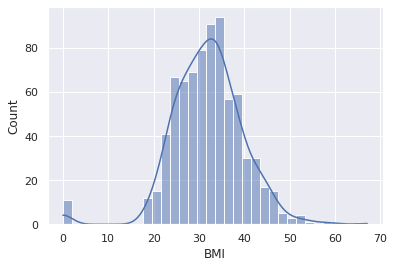

In [51]:
sns.histplot(data=df, x='BMI', kde=True)

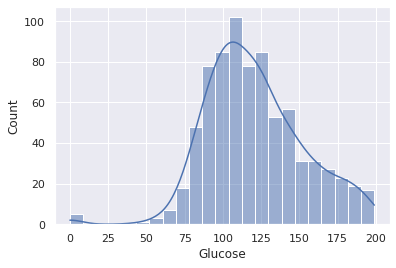

In [52]:
sns.histplot(data=df, x='Glucose', kde=True)

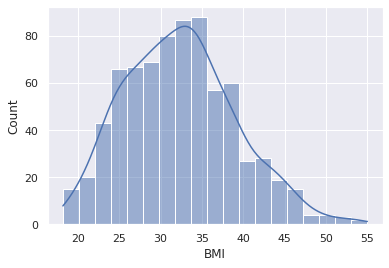

In [53]:
df2 = df[(np.abs(stats.zscore(df['BMI'])) < 3)]
sns.histplot(data=df2, x='BMI', kde=True)

(749, 9)

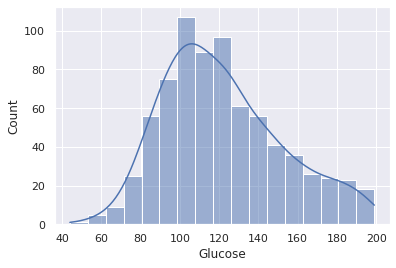

In [54]:
df3 = df2[(np.abs(stats.zscore(df2['Glucose'])) < 3)]
sns.histplot(data=df3, x='Glucose', kde=True)
df3.shape

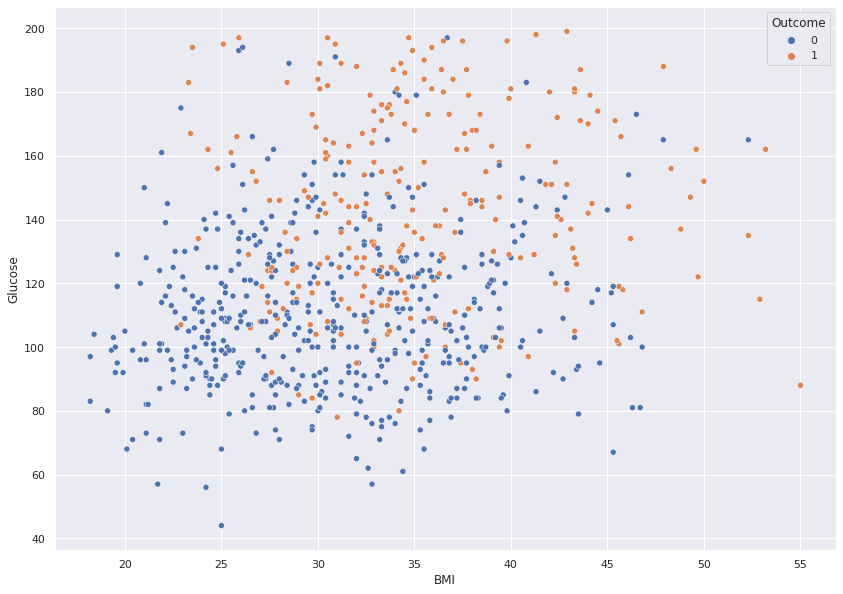

In [55]:
fig, ax = plt.subplots(figsize=(14,10))
sns.set_theme()
sns.scatterplot(x='BMI', y='Glucose', data=df3, hue='Outcome')

In [56]:
X = df3[['Glucose', 'BMI']].values
Y = df3['Outcome'].values
print(X.shape)
print(Y.shape)

(749, 2)
(749,)


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

print(knn.score(X_test, Y_test))
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))

0.8
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        98
           1       0.79      0.58      0.67        52

    accuracy                           0.80       150
   macro avg       0.80      0.75      0.76       150
weighted avg       0.80      0.80      0.79       150

[[90  8]
 [22 30]]
